<a href="https://colab.research.google.com/github/mustaphamerakech/tpMachineLearning/blob/main/handWrittenSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


 Load the Digits dataset from scikit-learn

In [5]:
digits = datasets.load_digits()
X = digits.data
y = digits.target


Explore the dataset

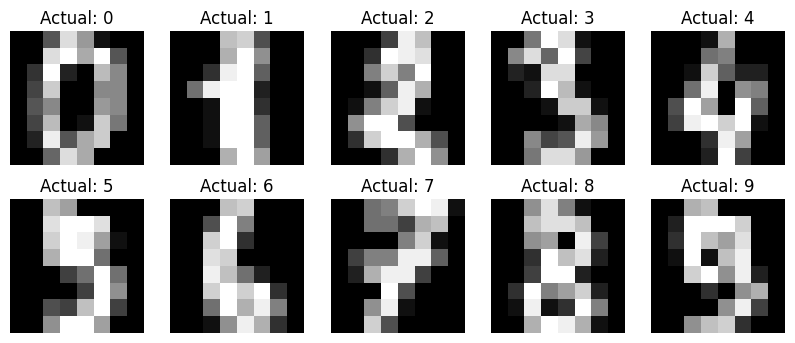

Number of samples: 1797
Number of features: 64
Number of classes: 10


In [6]:
# Display sample images
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Actual: {digits.target[i]}")
    ax.axis('off')

plt.show()

# Print dataset information
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")


In [7]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Normalize and rescale the pixel values

In [8]:
# Normalize pixel values
X_normalized = X / 16.0  # Assuming pixel values range from 0 to 16


Train an SVM Model
Split the dataset into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


Implement SVM using scikit-learn

In [10]:
# Create SVM model
svm_model = svm.SVC(kernel='linear')  # Use 'rbf' for radial basis function kernel

# Train the model
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

Model Evaluation
Evaluate the SVM model's performance

In [11]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


Accuracy: 0.9861111111111112
F1 Score: 0.9860812671144722


Visualize the confusion matrix

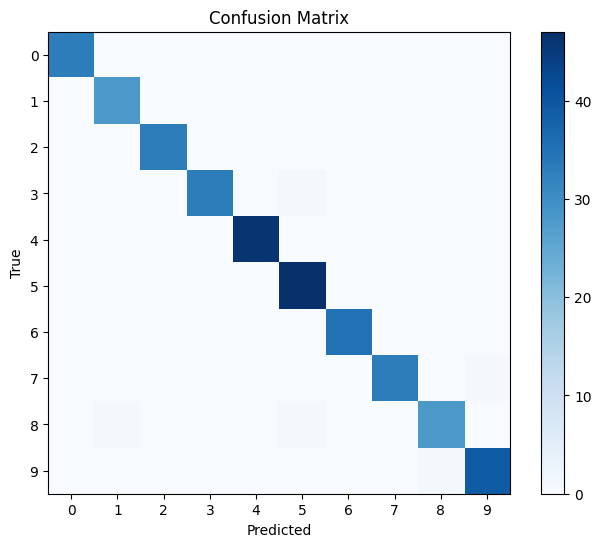

In [12]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = np.unique(y)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**question** **bonus**

In [13]:
# Assuming you already have the trained model (svm_model)

# New data for testing
new_test_data = np.array([
    # Add your new data here in the same format as the original dataset
    # For example, if each data point is an 8x8 image, flatten it to a 1D array
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
])

# Normalize the new test data
new_test_data_normalized = new_test_data / 16.0

# Make predictions on the new test data
new_test_predictions = svm_model.predict(new_test_data_normalized)

# Display the predictions for the new test data
print("Predictions for new test data:")
print(new_test_predictions)


Predictions for new test data:
[6]


**question bonus**

Predicted Labels: [0 1 2]


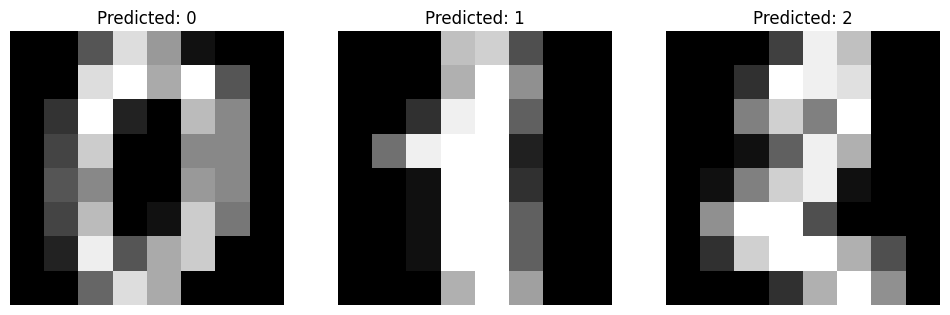

In [14]:

selected_indices = [0, 1, 2]
selected_images = digits.images[selected_indices]

# Preprocess the selected images
selected_images_normalized = selected_images / 16.0

# Flatten each image
num_images, height, width = selected_images_normalized.shape
flattened_images = selected_images_normalized.reshape(num_images, -1)

# Use the trained SVM model for prediction
predicted_labels = svm_model.predict(flattened_images)
print("Predicted Labels:", predicted_labels)

# Display the selected images and their predicted labels
fig, axes = plt.subplots(1, len(selected_images), figsize=(12, 4))
for i, ax in enumerate(axes):
    ax.imshow(selected_images[i], cmap='gray', interpolation='nearest')
    ax.set_title(f"Predicted: {predicted_labels[i]}")
    ax.axis('off')
plt.show()

from scratsh


In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM implementation from scratch
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0

        for epoch in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

            # Debugging: Print the current accuracy during training
            predictions = self.predict(X)
            accuracy = accuracy_score(y_, predictions)
            print(f"Epoch {epoch + 1}/{self.n_iters}, Accuracy: {accuracy}")

    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b)

# Create and train the SVM model
svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X_train, y_train)

# Make predictions
predictions = svm.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Final Accuracy: {accuracy}")


Epoch 1/1000, Accuracy: 0.9874739039665971
Epoch 2/1000, Accuracy: 0.9965205288796103
Epoch 3/1000, Accuracy: 0.9965205288796103
Epoch 4/1000, Accuracy: 0.9965205288796103
Epoch 5/1000, Accuracy: 0.9965205288796103
Epoch 6/1000, Accuracy: 0.9965205288796103
Epoch 7/1000, Accuracy: 0.9965205288796103
Epoch 8/1000, Accuracy: 0.9965205288796103
Epoch 9/1000, Accuracy: 0.9979123173277662
Epoch 10/1000, Accuracy: 0.9979123173277662
Epoch 11/1000, Accuracy: 0.9979123173277662
Epoch 12/1000, Accuracy: 0.9979123173277662
Epoch 13/1000, Accuracy: 0.9979123173277662
Epoch 14/1000, Accuracy: 0.9986082115518441
Epoch 15/1000, Accuracy: 0.9986082115518441
Epoch 16/1000, Accuracy: 0.9986082115518441
Epoch 17/1000, Accuracy: 0.9986082115518441
Epoch 18/1000, Accuracy: 0.9986082115518441
Epoch 19/1000, Accuracy: 0.9986082115518441
Epoch 20/1000, Accuracy: 0.9986082115518441
Epoch 21/1000, Accuracy: 0.9986082115518441
Epoch 22/1000, Accuracy: 0.9986082115518441
Epoch 23/1000, Accuracy: 0.99860821155184

Visualize the Decision Boundary
Visualize decision boundary for a subset of the data